In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

import matplotlib.pyplot as plt

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels),(test_images,test_labels) = fashion_mnist.load_data()

class_names = ["T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot"
]

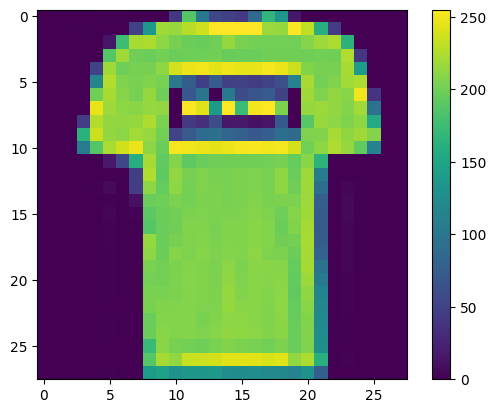

In [3]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.gca().grid(False)

In [4]:
train_images = train_images / 255.0
test_images = test_images / 255.0

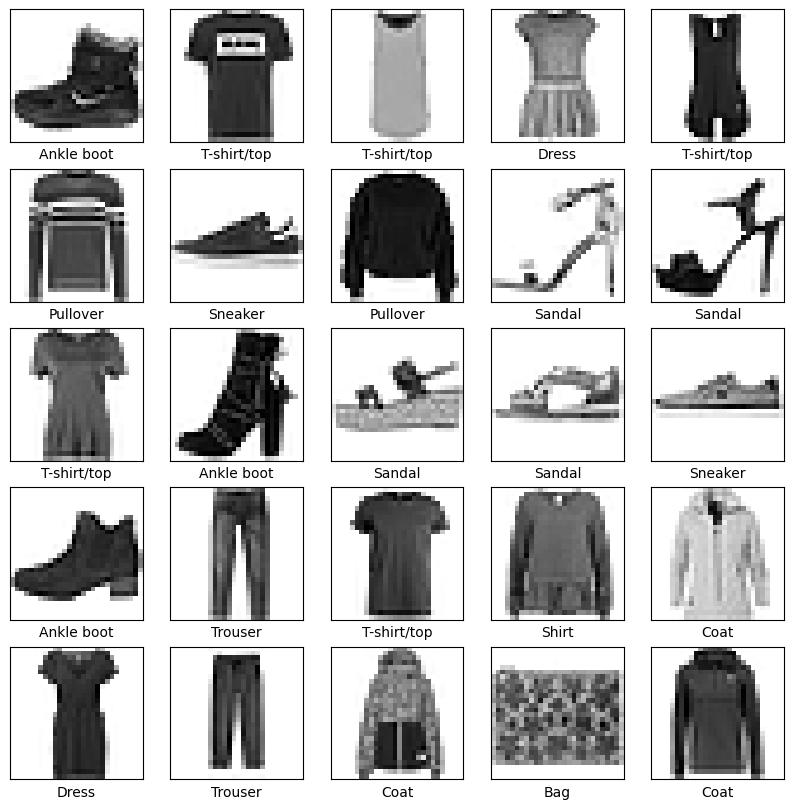

In [5]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid('off')
  plt.imshow(train_images[i], cmap =plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])

In [6]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation = tf.nn.relu),
    keras.layers.Dense(10, activation = tf.nn.softmax)
])

In [7]:
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 13s 6ms/step - loss: 0.4989 - accuracy: 0.8264
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3749 - accuracy: 0.8651
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3370 - accuracy: 0.8775
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3121 - accuracy: 0.8862
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2943 - accuracy: 0.8925
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2795 - accuracy: 0.8966
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2664 - accuracy: 0.9018
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2568 - accuracy: 0.9038
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2478 - accuracy: 0.9087
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.24

In [9]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Accuracy: ", test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3495 - accuracy: 0.8816
Accuracy:  0.881600022315979


In [10]:
predictions = model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


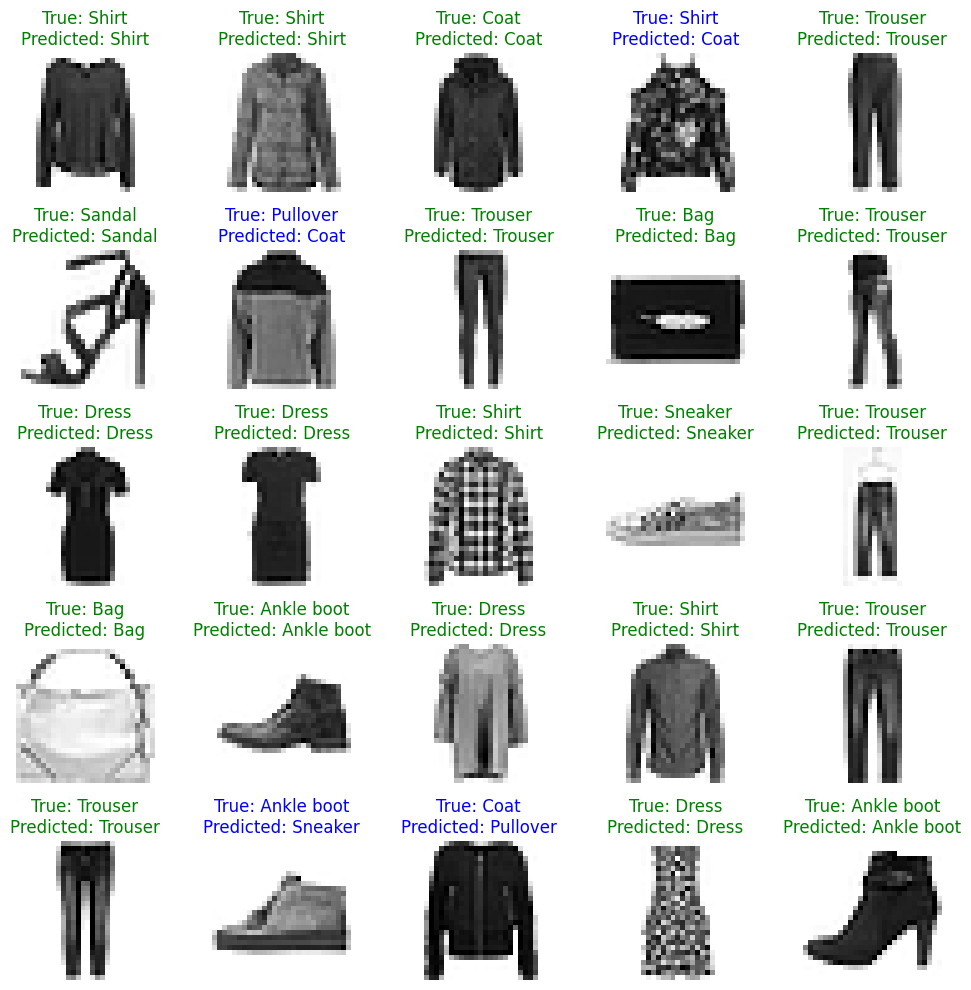

In [11]:
num_images = 25
random_indices = np.random.choice(test_images.shape[0], num_images, replace=False)

rows = 5
cols = 5

plt.figure(figsize=(10, 10))
for i, idx in enumerate(random_indices):
    plt.subplot(rows, cols, i + 1)

    predicted_label = np.argmax(predictions[idx])
    true_label = test_labels[idx]


    if predicted_label == true_label:
        text_color = 'green'
    else:
        text_color = 'blue'

    plt.imshow(test_images[idx], cmap=plt.cm.binary)
    plt.title(f"True: {class_names[true_label]}\nPredicted: {class_names[predicted_label]}", color=text_color)
    plt.axis('off')

plt.tight_layout()
plt.show()

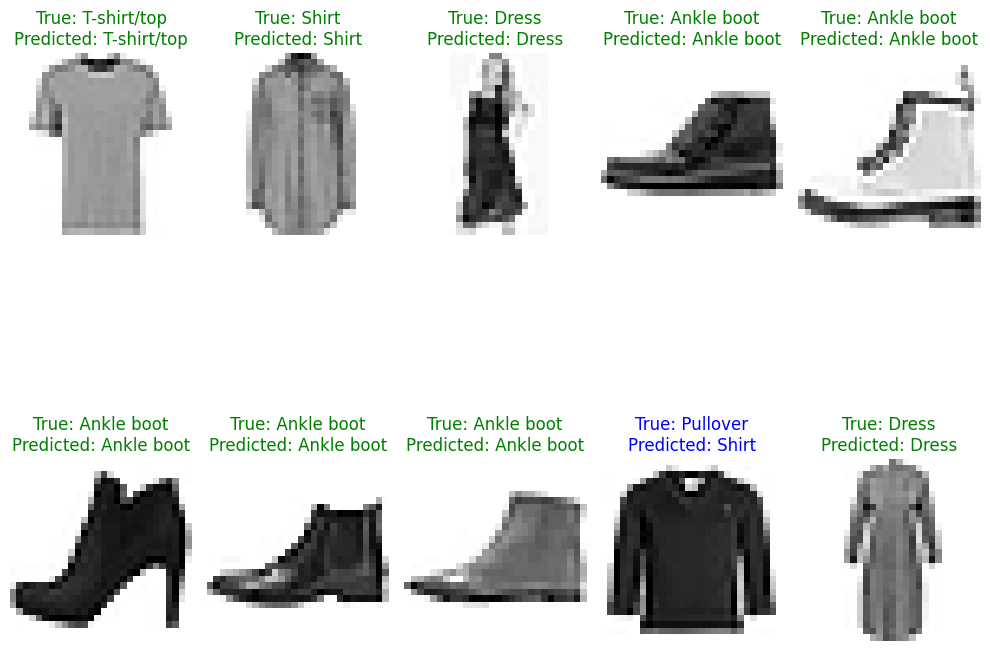

In [12]:
num_images = 10
random_indices = np.random.choice(test_images.shape[0], num_images, replace=False)

rows = 2
cols = 5

plt.figure(figsize=(10, 10))
for i, idx in enumerate(random_indices):
    plt.subplot(rows, cols, i + 1)

    predicted_label = np.argmax(predictions[idx])
    true_label = test_labels[idx]


    if predicted_label == true_label:
        text_color = 'green'
    else:
        text_color = 'blue'

    plt.imshow(test_images[idx], cmap=plt.cm.binary)
    plt.title(f"True: {class_names[true_label]}\nPredicted: {class_names[predicted_label]}", color=text_color)
    plt.axis('off')

plt.tight_layout()
plt.show()